In [1]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

In [2]:
x_points = [math.pi / 2, math.pi / 3, math.pi / 6, 0]
y_points = [math.sin(current) for current in x_points]
x = sp.symbols("x")

def lagrange_interpolation(x_points, y_points):
    result = 0

    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(y_points)):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return sp.simplify(result)

In [7]:
pol = lagrange_interpolation(x_points, y_points)
x_target = math.pi / 5
real_value = math.sin(x_target)
appr_value = pol.subs(x, x_target)

print(real_value, appr_value)

0.5877852522924731 0.587061487217439


In [9]:
def absolute_error():
    return abs(real_value - appr_value) 

error_estimate = 1/24 * abs(math.pi/5 * (math.pi/5 - math.pi/6) * (math.pi/5 - math.pi/3) * (math.pi/5 - math.pi/2))
real_error = absolute_error()
relative_error = real_error / x_target

print(real_error, error_estimate, relative_error)

0.000723765075034244 0.0010823232337111382 0.00115190789328976


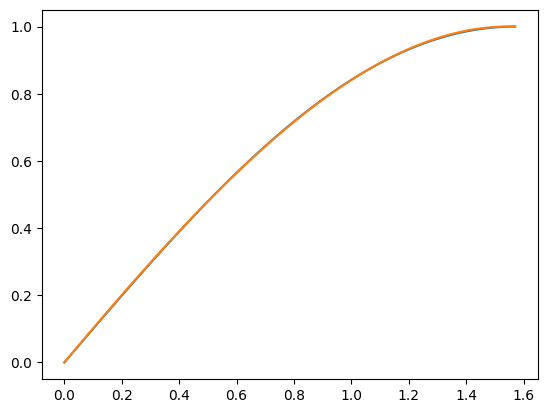

In [10]:
x_range = np.linspace(0, math.pi / 2, 500)
sin_values = [math.sin(current) for current in x_range]
pol_values = [pol.subs(x, current) for current in x_range]

plt.plot(x_range, sin_values)
plt.plot(x_range, pol_values)
plt.show()